In [58]:
gene_list = ["12510at7088","5159at7088","period"]

import pandas as pd

location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state"

diapause = pd.read_csv(f"{location}/ERC_correlation_diapause_long.csv")



print(diapause)

                  Row        Gene1     Gene2
0         11864at7088  11864at7088  1.000000
1         11335at7088  11864at7088  0.179145
2           296at7088  11864at7088  0.038285
3          2802at7088  11864at7088  0.030179
4          8151at7088  11864at7088  0.142084
...               ...          ...       ...
20894036   1011at7088    696at7088  0.456657
20894037  11693at7088    696at7088 -0.058632
20894038  11225at7088    696at7088  0.080292
20894039   5866at7088    696at7088 -0.143437
20894040    696at7088    696at7088       NaN

[20894041 rows x 3 columns]


In [62]:
remove = ["2273at7088","1422at7088","5474at7088","2905at7088"]
filtered_df = diapause[diapause['Row'].isin(gene_list) & (diapause['Gene2'] > 0.4) & (~diapause['Gene1'].isin(remove))]
location = "/mnt/c/Users/Saurav Baral/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
gene_anno_dic = {}
with open(f"{location}/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()


filtered_df = filtered_df.rename(columns={"Gene2": "Correlation"})
filtered_df = filtered_df.rename(columns={"Gene1": "Gene2"})
filtered_df = filtered_df.rename(columns={"Row": "Gene1"})
def check_annotation(name):
    return gene_anno_dic.get(name, name)

filtered_df["Annotation_gene1"] = filtered_df["Gene1"].apply(check_annotation)
filtered_df["Annotation_gene2"] = filtered_df["Gene2"].apply(check_annotation)

filtered_df["Correlation"].fillna(1, inplace=True)

print(filtered_df)

                Gene1        Gene2  Correlation Annotation_gene1  \
603705     5159at7088   1904at7088     0.503934          PDCD6IP   
987669     5159at7088   7919at7088     0.408581          PDCD6IP   
1128040   12510at7088   2813at7088     0.416580           CHMP1B   
1338306   12510at7088  12445at7088     0.445477           CHMP1B   
1353349    5159at7088   4069at7088     0.419094          PDCD6IP   
...               ...          ...          ...              ...   
20253104  12510at7088   3683at7088     0.411433           CHMP1B   
20519552   5159at7088   2672at7088     0.406355          PDCD6IP   
20577645  12510at7088  11201at7088     0.410873           CHMP1B   
20760485  12510at7088   4935at7088     0.436664           CHMP1B   
20866948   5159at7088   8902at7088     0.441258          PDCD6IP   

         Annotation_gene2  
603705               BRAF  
987669                 bi  
1128040             ACTR8  
1338306              ARL3  
1353349              USP1  
...            

In [63]:
filtered_df.to_csv(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/3.Rho_set_from_diapausing_lineage/dia_rho_set.csv")

print(filtered_df)

                Gene1        Gene2  Correlation Annotation_gene1  \
603705     5159at7088   1904at7088     0.503934          PDCD6IP   
987669     5159at7088   7919at7088     0.408581          PDCD6IP   
1128040   12510at7088   2813at7088     0.416580           CHMP1B   
1338306   12510at7088  12445at7088     0.445477           CHMP1B   
1353349    5159at7088   4069at7088     0.419094          PDCD6IP   
...               ...          ...          ...              ...   
20253104  12510at7088   3683at7088     0.411433           CHMP1B   
20519552   5159at7088   2672at7088     0.406355          PDCD6IP   
20577645  12510at7088  11201at7088     0.410873           CHMP1B   
20760485  12510at7088   4935at7088     0.436664           CHMP1B   
20866948   5159at7088   8902at7088     0.441258          PDCD6IP   

         Annotation_gene2  
603705               BRAF  
987669                 bi  
1128040             ACTR8  
1338306              ARL3  
1353349              USP1  
...            

In [26]:
rho_set_dictionary = {}
rho_set_dictionary_unanno = {}
remove = ["1422at7088","5474at7088","2905at7088","2273at7088"]
for row in filtered_df.itertuples(index=True):
    if row[2] in remove:
        continue
    rho_set_dictionary.setdefault((row[4],row[1]), [])
    rho_set_dictionary[(row[4],row[1])].append(row[5])
    rho_set_dictionary_unanno.setdefault(row[1], [])
    rho_set_dictionary_unanno[row[1]].append(row[2])
    
    # print(row)
    # break
print(rho_set_dictionary[("period","period")])
print(rho_set_dictionary_unanno["period"])
    

['clock', 'cycle', 'period', 'YY1', 'cry2', 'timeless', 'DDR2']
['clock', 'cycle', 'period', '6437at7088', 'cry2', 'timeless', '2021at7088']


In [29]:
candidate_list = rho_set_dictionary_unanno["period"]
print(candidate_list)


filtered_df_can_list = diapause[diapause['Row'].isin(candidate_list) & diapause['Gene1'].isin(candidate_list)]
print(filtered_df_can_list)


filtered_df_can_list = filtered_df_can_list.rename(columns={"Gene2": "Correlation"})
filtered_df_can_list = filtered_df_can_list.rename(columns={"Gene1": "Gene2"})
filtered_df_can_list = filtered_df_can_list.rename(columns={"Row": "Gene1"})
def check_annotation(name):
    return gene_anno_dic.get(name, name)

filtered_df_can_list["Annotation_gene1"] = filtered_df_can_list["Gene1"].apply(check_annotation)
filtered_df_can_list["Annotation_gene2"] = filtered_df_can_list["Gene2"].apply(check_annotation)

filtered_df_can_list["Correlation"].fillna(1, inplace=True)


['clock', 'cycle', 'period', '6437at7088', 'cry2', 'timeless', '2021at7088']
                 Row       Gene1     Gene2
3035808        clock       clock  1.000000
3036455        cycle       clock  0.480512
3037467       period       clock  0.654431
3037658   6437at7088       clock  0.359877
3038113         cry2       clock  0.461440
3039450     timeless       clock  0.583511
3039530   2021at7088       clock  0.379074
5993245        clock       cycle  0.480512
5993892        cycle       cycle  1.000000
5994904       period       cycle  0.451509
5995095   6437at7088       cycle  0.321723
5995550         cry2       cycle  0.395466
5996887     timeless       cycle  0.364145
5996967   2021at7088       cycle  0.222956
10619097       clock      period  0.654431
10619744       cycle      period  0.451509
10620756      period      period  1.000000
10620947  6437at7088      period  0.410444
10621402        cry2      period  0.547946
10622739    timeless      period  0.699599
10622819  2021at7088

<Figure size 640x480 with 0 Axes>

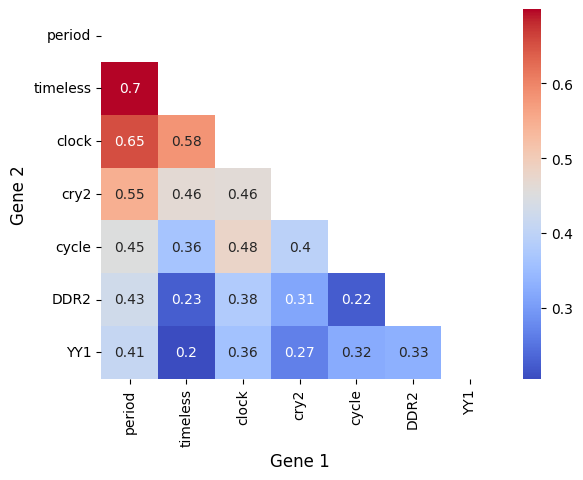

<Figure size 640x480 with 0 Axes>

In [54]:
# print(filtered_df_can_list)

filtered_df_can_list_pivot = filtered_df_can_list.pivot(index="Annotation_gene1", columns="Annotation_gene2", values="Correlation")
# print(filtered_df_can_list_pivot)
custom_order = [ "period","timeless","clock", "cry2", "cycle", "DDR2", "YY1"]
filtered_df_can_list_pivot = filtered_df_can_list_pivot.reindex(index=custom_order, columns=custom_order)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# mask =np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))

# Create clustered heatmap with masking
# 
# sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True,mask=mask, linewidths=0.5, figsize=(8, 6))


# mask = np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
# plt.figure(figsize=(8, 8))

ax = sns.heatmap(filtered_df_can_list_pivot, mask=mask, annot=True, cmap='coolwarm', cbar=True)

# ax = sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True, linewidths=0.5, figsize=(8, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 

ax.set_xlabel("Gene 1", fontsize=12)
ax.set_ylabel("Gene 2", fontsize=12)


plt.savefig(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/3.Rho_set_from_diapausing_lineage/1.Rho_set_period/ERC_correlation_diapause.pdf", dpi=300, bbox_inches="tight")
plt.figure()
# sns.clustermap(filtered_df, cmap='coolwarm', annot=True)
# plt.show()

In [51]:
print(location)

/mnt/c/Users/Saurav Baral/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree


In [5]:

location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)"

import pandas as pd
print("AA")
diapause_erc = pd.read_csv(f"{location}/2.Two_state/ERC_correlation_diapause.csv")
# with open(f"{location}/2.Two_state/ERC_correlation_diapause_long.csv", 'r') as dia_long:
#     for line in dia_long.readlines():
#         print(line)
#         break

print(diapause_erc)

print(diapause_erc)

      11864at7088_nostop.fas.aligned.fas.best.fas.ClipKIT  \
0                                              1.000000     
1                                              0.179145     
2                                              0.038285     
3                                              0.030179     
4                                              0.142084     
...                                                 ...     
4566                                          -0.043481     
4567                                           0.189890     
4568                                           0.170227     
4569                                           0.301710     
4570                                          -0.101231     

      11335at7088_nostop.fas.aligned.fas.best.fas.ClipKIT  \
0                                              0.179145     
1                                              1.000000     
2                                              0.214917     
3                      